In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
import Thermobar as pt
pd.options.display.max_columns = None
w.simplefilter(action="ignore", category=FutureWarning)

In [6]:
out_Cpx_B1038=pt.import_excel('Hawaii_Data.xlsx',
                              sheet_name='Sheet1')
Cpx_B1038_all=out_Cpx_B1038['Cpxs']
Liq_B1038_all=out_Cpx_B1038['Liqs']
Cpx_B1038_input_all=out_Cpx_B1038['my_input']


# NP eq33

In [36]:
NPeq33=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpx_B1038_all, liq_comps=Liq_B1038_all,
                                       equationP="P_Neave2017", equationT="T_Put2008_eq33")
P30P33=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpx_B1038_all, liq_comps=Liq_B1038_all,
                                       equationP="P_Put2008_eq30", equationT="T_Put2008_eq33")

P1996=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpx_B1038_all, liq_comps=Liq_B1038_all,
                                       equationP="P_Put1996_eqP1", equationT="T_Put1996_eqT1")

eq32a32d=pt.calculate_cpx_only_press_temp(cpx_comps=Cpx_B1038_all, 
                                       equationP="P_Put2008_eq32a",
                                         equationT="T_Put2008_eq32d")

Youve selected a P-independent function


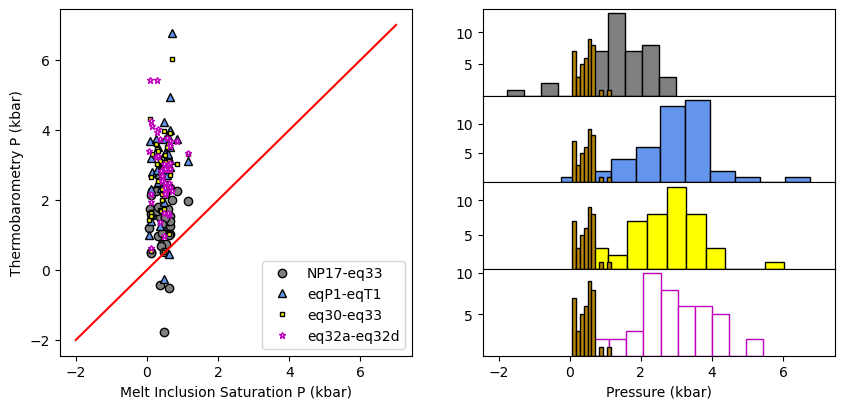

In [70]:
figure_mosaic="""
    AB
    AC
    AD
    AE

    """
fig,axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(10, 4.5), sharex=True)
axes['B'].axes.get_xaxis().set_visible(False)
axes['C'].axes.get_xaxis().set_visible(False)
axes['D'].axes.get_xaxis().set_visible(False)


axes['A'].plot( Cpx_B1038_input_all['SaturationP_bars_VESIcal']/1000,
         NPeq33['P_kbar_calc'],'o', mfc='grey', mec='k', label='NP17-eq33')
axes['A'].plot( Cpx_B1038_input_all['SaturationP_bars_VESIcal']/1000,
        P1996['P_kbar_calc'],'^', mfc='cornflowerblue', mec='k', alpha=1, label='eqP1-eqT1')

axes['A'].plot( Cpx_B1038_input_all['SaturationP_bars_VESIcal']/1000,
        P30P33['P_kbar_calc'],'sk', mfc='yellow', ms=3, label='eq30-eq33')
axes['A'].plot(Cpx_B1038_input_all['SaturationP_bars_VESIcal']/1000,
        eq32a32d['P_kbar_calc'],'*m', mfc='white', ms=5, label='eq32a-eq32d')
axes['A'].legend()
    
    
axes['A'].plot([-2, 7], [-2, 7], '-r')

axes['B'].hist(NPeq33['P_kbar_calc'], fc='grey', ec='k')
axes['B'].hist(Cpx_B1038_input_all['SaturationP_bars_VESIcal']/1000, color='darkgoldenrod', ec='k')

axes['C'].hist(P1996['P_kbar_calc'], fc='cornflowerblue', ec='k')
axes['C'].hist(Cpx_B1038_input_all['SaturationP_bars_VESIcal']/1000, color='darkgoldenrod', ec='k')

axes['D'].hist(P30P33['P_kbar_calc'], fc='yellow', ec='k')
axes['D'].hist(Cpx_B1038_input_all['SaturationP_bars_VESIcal']/1000, color='darkgoldenrod', ec='k')

axes['E'].hist( eq32a32d['P_kbar_calc'], fc='White', ec='m')
axes['E'].hist(Cpx_B1038_input_all['SaturationP_bars_VESIcal']/1000, color='darkgoldenrod', ec='k')
axes['B'].set_yticks([5, 10])
axes['C'].set_yticks([5, 10])
axes['D'].set_yticks([5, 10])
axes['E'].set_yticks([5, 10])
axes['A'].set_xlabel('Melt Inclusion Saturation P (kbar)')
axes['A'].set_ylabel('Thermobarometry P (kbar)')
axes['E'].set_xlabel('Pressure (kbar)')
plt.subplots_adjust(wspace=0.2, hspace=0)

(-2.0, 7.0)

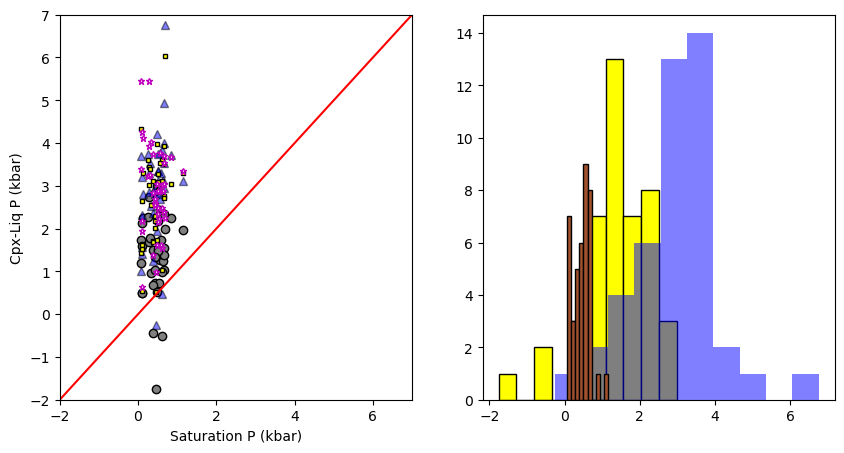

In [39]:


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot( Cpx_B1038_input_all['SaturationP_bars_VESIcal']/1000,
         NPeq33['P_kbar_calc'],'o', mfc='grey', mec='k')
ax1.plot( Cpx_B1038_input_all['SaturationP_bars_VESIcal']/1000,
        P1996['P_kbar_calc'],'^b', mec='k', alpha=0.5)

ax1.plot( Cpx_B1038_input_all['SaturationP_bars_VESIcal']/1000,
        P30P33['P_kbar_calc'],'sk', mfc='yellow', ms=3)
ax1.plot(Cpx_B1038_input_all['SaturationP_bars_VESIcal']/1000,
        eq32a32d['P_kbar_calc'],'*m', mfc='white', ms=5)
    
    
ax1.plot([-2, 7], [-2, 7], '-r')

ax2.hist(NPeq33['P_kbar_calc'], fc='yellow', ec='k')

ax2.hist(P1996['P_kbar_calc'], color='blue', alpha=0.5)
ax2.hist(Cpx_B1038_input_all['SaturationP_bars_VESIcal']/1000, color='sienna', ec='k')
ax1.set_xlabel('Saturation P (kbar)')
ax1.set_ylabel('Cpx-Liq P (kbar)')
ax1.set_xlim([-2, 7])
ax1.set_ylim([-2, 7])